In [156]:
library(tidyverse)
library(tidymodels)
library(repr)
options(repr.matrix.max.rows=6)

### Project Proposal

### Preliminary Exploratory Data Analysis


Firstly, we read the 4 datasets directly from the webs, give every column a specfic header name, and use mutate to convert every column into the correct and most appropriate data type. Then, all of datasets are in a tidy fromat. 

Secondly, we split every dataset into a training set and a testing set with strata = num, ensuring that roughly the same proportion of 0 and 1(0 means no diagnosis; 1 means disagosed) ends up in both training and testing sets. In next steps, we only analyze, summarize, and visualize the the traning sets of the 4 datasets.

In [157]:
set.seed(18)
con_names1<-c("age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang", "oldpeak","slope","ca","thal","num")
heart_cleaveland<-read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data",
                           col_names = con_names1)

cleaveland_mutate<-heart_cleaveland|>
filter(num == 1 | num == 0)|>
mutate(sex=as_factor(sex))|>
mutate(cp=as_factor(cp))|>
mutate(fbs=as_factor(fbs))|>
mutate(restecg=as_factor(restecg))|>
mutate(exang=as_factor(exang))|>
mutate(slope=as_factor(slope))|>
mutate(ca=as_factor(ca))|>
mutate(thal=as_factor(thal))|>
mutate(num=as_factor(num))

cleaveland_split <- initial_split(cleaveland_mutate, prop = 0.75, strata = num)
cleaveland_training <- training(cleaveland_split)
cleaveland_testing <- testing(cleaveland_split)

cleaveland_training

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): ca, thal
dbl (12): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [158]:
heart_switzerland<-read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.switzerland.data", 
                            col_names = con_names1)
switzerland_mutate <- heart_switzerland|>
filter(num==0|num==1)|>
mutate(sex=as_factor(sex))|>
mutate(cp=as_factor(cp))|>
mutate(fbs=as_factor(fbs))|>
mutate(restecg=as_factor(restecg))|>
mutate(exang=as_factor(exang))|>
mutate(slope=as_factor(slope))|>
mutate(ca=as_factor(ca))|>
mutate(thal=as_factor(thal))|>
mutate(num=as_factor(num))

switzerland_split <- initial_split(switzerland_mutate, prop = 0.75, strata = num)
switzerland_training <- training(switzerland_split)
switzerland_testing <- testing(switzerland_split)

switzerland_training


Rows: 123 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): trestbps, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal
dbl (5): age, sex, cp, chol, num

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<fct>,<fct>,<chr>,<dbl>,<fct>,<fct>,<chr>,<fct>,<chr>,<fct>,<fct>,<fct>,<fct>
45,1,3,110,0,?,0,138,0,-.1,1,?,?,0
53,1,4,80,0,?,0,141,1,2,3,?,?,0
55,1,2,140,0,?,1,150,0,.2,1,?,?,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
65,1,4,115,0,0,0,93,1,0,2,?,7,1
66,0,4,155,0,?,0,90,0,0,?,?,7,1
74,1,2,145,0,?,1,123,0,1.3,1,?,?,1


In [159]:
heart_va <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.va.data", 
                     col_names = con_names1)

va_mutate <- heart_va|>
filter(num==0|num==1)|>
mutate(sex=as_factor(sex))|>
mutate(cp=as_factor(cp))|>
mutate(fbs=as_factor(fbs))|>
mutate(restecg=as_factor(restecg))|>
mutate(exang=as_factor(exang))|>
mutate(slope=as_factor(slope))|>
mutate(ca=as_factor(ca))|>
mutate(thal=as_factor(thal))|>
mutate(num=as_factor(num))

va_split <- initial_split(va_mutate, prop = 0.75, strata = num)
va_training <- training(va_split)
va_testing <- testing(va_split)

va_training

Rows: 200 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): trestbps, chol, fbs, thalach, exang, oldpeak, slope, ca, thal
dbl (5): age, sex, cp, restecg, num

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<fct>,<fct>,<chr>,<chr>,<fct>,<fct>,<chr>,<fct>,<chr>,<fct>,<fct>,<fct>,<fct>
44,1,4,130,209,0,1,127,0,0,?,?,?,0
66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
60,1,3,180,0,0,1,140,1,1.5,2,?,?,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
62,1,4,158,170,0,1,138,1,0,?,?,?,1
54,0,4,127,333,1,1,154,0,0,?,?,?,1
62,1,2,120,254,0,2,93,1,0,?,?,?,1


In [160]:
heart_hungarian <- read_delim("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/reprocessed.hungarian.data",delim=" ", 
                              col_names = con_names1)
hungarian_mutate <- heart_hungarian|>
filter(num==0|num==1)|>
mutate(sex=as_factor(sex))|>
mutate(cp=as_factor(cp))|>
mutate(fbs=as_factor(fbs))|>
mutate(restecg=as_factor(restecg))|>
mutate(exang=as_factor(exang))|>
mutate(slope=as_factor(slope))|>
mutate(ca=as_factor(ca))|>
mutate(thal=as_factor(thal))|>
mutate(num=as_factor(num))


hungarian_split <- initial_split(hungarian_mutate, prop = 0.75, strata = num)
hungarian_training <- training(hungarian_split)
hungarian_testing <- testing(hungarian_split)

hungarian_training


Rows: 294 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: " "
dbl (14): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>
37,1,2,130,283,0,1,98,0,0,-9,-9,-9,0
54,1,3,150,-9,0,0,122,0,0,-9,-9,-9,0
45,0,2,130,237,0,0,170,0,0,-9,-9,-9,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
48,1,4,160,268,0,0,103,1,1,2,-9,-9,1
48,1,4,120,260,0,0,115,0,2,2,-9,-9,1
55,1,4,140,201,0,0,130,1,3,2,-9,-9,1


-------------------------------------------------------------------------------------------------------------------------------

### Summary of the five predictors for the four HeartDisease datasets
We summarize the five numerical predictors(age, trestbps, chol, thalach, oldpeak) to see if there are obvious differences in two different version(Fist one for the whole dataset and Second one for diagnosed dataset) for that four datasets.

In [192]:
cleaveland_5predictors_all_summary<-summarize(cleaveland_training,
                                        age_max=max(age),
                                        age_min=min(age),
                                        age_mean=mean(age),
                                        trestbps_max=max(trestbps),
                                        trestbps_min=min(trestbps),
                                        trestbps_mean=mean(trestbps),
                                        chol_max=max(chol),
                                        chol_min=min(chol),
                                        chol_mean=mean(chol),
                                        thalach_max=max(thalach),
                                        thalach_min=min(thalach),
                                        thalach_mean=mean(thalach),
                                        oldpeak_max=max(oldpeak),
                                        oldpeak_min=min(oldpeak),
                                        oldpeak_mean=mean(oldpeak))

cleaveland_5predictors_diagnosed_summary<-summarize(cleaveland_training|>filter(num==1),
                                        age_max_diagnosed=max(age),
                                        age_min_diagnosed=min(age),
                                        age_mean_diagnosed=mean(age),
                                        trestbps_max_diagnosed=max(trestbps),
                                        trestbps_min_diagnosed=min(trestbps),
                                        trestbps_mean_diagnosed=mean(trestbps),
                                        chol_max_diagnosed=max(chol),
                                        chol_min_diagnosed=min(chol),
                                        chol_mean_diagnosed=mean(chol),
                                        thalach_max_diagnosed=max(thalach),
                                        thalach_min_diagnosed=min(thalach),
                                        thalach_mean_diagnosed=mean(thalach),
                                        oldpeak_max_diagnosed=max(oldpeak),
                                        oldpeak_min_diagnosed=min(oldpeak),
                                        oldpeak_mean_diagnosed=mean(oldpeak))

In [193]:
cleaveland_5predictors_all_summary

age_max,age_min,age_mean,trestbps_max,trestbps_min,trestbps_mean,chol_max,chol_min,chol_mean,thalach_max,thalach_min,thalach_mean,oldpeak_max,oldpeak_min,oldpeak_mean
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
76,29,52.55488,192,94,130.372,417,157,246,202,88,156.7927,4.2,0,0.6743902


In [194]:
cleaveland_5predictors_diagnosed_summary

age_max_diagnosed,age_min_diagnosed,age_mean_diagnosed,trestbps_max_diagnosed,trestbps_min_diagnosed,trestbps_mean_diagnosed,chol_max_diagnosed,chol_min_diagnosed,chol_mean_diagnosed,thalach_max_diagnosed,thalach_min_diagnosed,thalach_mean_diagnosed,oldpeak_max_diagnosed,oldpeak_min_diagnosed,oldpeak_mean_diagnosed
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
70,35,55.39024,192,108,134.1951,335,172,251.2195,195,88,146.6585,3.6,0,0.9121951


In [189]:
switzerland_5predictors_all_summary<-summarize(switzerland_training,
                                        age_max=max(age),
                                        age_min=min(age),
                                        age_mean=mean(age),
                                        trestbps_max=max(trestbps),
                                        trestbps_min=min(trestbps),
                                        trestbps_mean=mean(trestbps),
                                        chol_max=max(chol),
                                        chol_min=min(chol),
                                        chol_mean=mean(chol),
                                        thalach_max=max(thalach),
                                        thalach_min=min(thalach),
                                        thalach_mean=mean(thalach),
                                        oldpeak_max=max(oldpeak),
                                        oldpeak_min=min(oldpeak),
                                        oldpeak_mean=mean(oldpeak))

switzerland_5predictors_diagnosed_summary<-summarize(switzerland_training|>filter(num==1),
                                        age_max_diagnosed=max(age),
                                        age_min_diagnosed=min(age),
                                        age_mean_diagnosed=mean(age),
                                        trestbps_max_diagnosed=max(trestbps),
                                        trestbps_min_diagnosed=min(trestbps),
                                        trestbps_mean_diagnosed=mean(trestbps),
                                        chol_max_diagnosed=max(chol),
                                        chol_min_diagnosed=min(chol),
                                        chol_mean_diagnosed=mean(chol),
                                        thalach_max_diagnosed=max(thalach),
                                        thalach_min_diagnosed=min(thalach),
                                        thalach_mean_diagnosed=mean(thalach),
                                        oldpeak_max_diagnosed=max(oldpeak),
                                        oldpeak_min_diagnosed=min(oldpeak),
                                        oldpeak_mean_diagnosed=mean(oldpeak))

Warning message in mean.default(trestbps):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(thalach):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(oldpeak):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(trestbps):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(thalach):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(oldpeak):
“argument is not numeric or logical: returning NA”


In [190]:
switzerland_5predictors_all_summary

age_max,age_min,age_mean,trestbps_max,trestbps_min,trestbps_mean,chol_max,chol_min,chol_mean,thalach_max,thalach_min,thalach_mean,oldpeak_max,oldpeak_min,oldpeak_mean
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>
74,32,55.83333,95,100,NA,0,0,0,98,105,NA,2.6,-.1,NA


In [191]:
switzerland_training_5predictors_diagnosed_summary

age_max_diagnosed,age_min_diagnosed,age_mean_diagnosed,trestbps_max_diagnosed,trestbps_min_diagnosed,trestbps_mean_diagnosed,chol_max_diagnosed,chol_min_diagnosed,chol_mean_diagnosed,thalach_max_diagnosed,thalach_min_diagnosed,thalach_mean_diagnosed,oldpeak_max_diagnosed,oldpeak_min_diagnosed,oldpeak_mean_diagnosed
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>
74,32,55.52778,95,100,NA,0,0,0,98,105,NA,2.6,-.5,NA


In [206]:
"va_summary<-filter(va_training, age!="?"|trestbps!="?"|chol!="?"|thalach!="?"|oldpeak_min!="?")"

ERROR: Error in `?`("va_summary<-filter(va_training, age!=", "|trestbps!="): no documentation of type ‘va_summary<-filter(va_training, age!=’ and topic ‘|trestbps!=’ (or error in processing help)


In [205]:
va_5predictors_all_summary<-summarize(va_training|> filter(trestbps!="?"),
                                        age_max=max(age),
                                        age_min=min(age),
                                        age_mean=mean(age),
                                        trestbps_max=max(trestbps),
                                        trestbps_min=min(trestbps),
                                        trestbps_mean=mean(trestbps),
                                        chol_max=max(chol),
                                        chol_min=min(chol),
                                        chol_mean=mean(chol),
                                        thalach_max=max(thalach),
                                        thalach_min=min(thalach),
                                        thalach_mean=mean(thalach),
                                        oldpeak_max=max(oldpeak),
                                        oldpeak_min=min(oldpeak),
                                        oldpeak_mean=mean(oldpeak))

va_5predictors_diagnosed_summary<-summarize(va_training|>filter(num==1),
                                        age_max_diagnosed=max(age),
                                        age_min_diagnosed=min(age),
                                        age_mean_diagnosed=mean(age),
                                        trestbps_max_diagnosed=max(trestbps),
                                        trestbps_min_diagnosed=min(trestbps),
                                        trestbps_mean_diagnosed=mean(trestbps),
                                        chol_max_diagnosed=max(chol),
                                        chol_min_diagnosed=min(chol),
                                        chol_mean_diagnosed=mean(chol),
                                        thalach_max_diagnosed=max(thalach),
                                        thalach_min_diagnosed=min(thalach),
                                        thalach_mean_diagnosed=mean(thalach),
                                        oldpeak_max_diagnosed=max(oldpeak),
                                        oldpeak_min_diagnosed=min(oldpeak),
                                        oldpeak_mean_diagnosed=mean(oldpeak))

Warning message in mean.default(trestbps):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(chol):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(thalach):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(oldpeak):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(trestbps):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(chol):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(thalach):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(oldpeak):
“argument is not numeric or logical: returning NA”


In [204]:
va_5predictors_all_summary

age_max,age_min,age_mean,trestbps_max,trestbps_min,trestbps_mean,chol_max,chol_min,chol_mean,thalach_max,thalach_min,thalach_mean,oldpeak_max,oldpeak_min,oldpeak_mean
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>
75,37,56.38182,96,100,NA,458,0,NA,99,100,NA,3,?,NA


In [202]:
va_5predictors_diagnosed_summary

age_max_diagnosed,age_min_diagnosed,age_mean_diagnosed,trestbps_max_diagnosed,trestbps_min_diagnosed,trestbps_mean_diagnosed,chol_max_diagnosed,chol_min_diagnosed,chol_mean_diagnosed,thalach_max_diagnosed,thalach_min_diagnosed,thalach_mean_diagnosed,oldpeak_max_diagnosed,oldpeak_min_diagnosed,oldpeak_mean_diagnosed
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>
75,38,57.09524,96,?,NA,349,?,NA,98,?,NA,3,?,NA


In [104]:
hungarian_5predictors_all_summary<-summarize(hungarian_training,
                                        age_max=max(age),
                                        age_min=min(age),
                                        age_mean=mean(age),
                                        trestbps_max=max(trestbps),
                                        trestbps_min=min(trestbps),
                                        trestbps_mean=mean(trestbps),
                                        chol_max=max(chol),
                                        chol_min=min(chol),
                                        chol_mean=mean(chol),
                                        thalach_max=max(thalach),
                                        thalach_min=min(thalach),
                                        thalach_mean=mean(thalach),
                                        oldpeak_max=max(oldpeak),
                                        oldpeak_min=min(oldpeak),
                                        oldpeak_mean=mean(oldpeak))

hungarian_5predictors_diagnosed_summary<-summarize(hungarian_training|>filter(num==1),
                                        age_max_diagnosed=max(age),
                                        age_min_diagnosed=min(age),
                                        age_mean_diagnosed=mean(age),
                                        trestbps_max_diagnosed=max(trestbps),
                                        trestbps_min_diagnosed=min(trestbps),
                                        trestbps_mean_diagnosed=mean(trestbps),
                                        chol_max_diagnosed=max(chol),
                                        chol_min_diagnosed=min(chol),
                                        chol_mean_diagnosed=mean(chol),
                                        thalach_max_diagnosed=max(thalach),
                                        thalach_min_diagnosed=min(thalach),
                                        thalach_mean_diagnosed=mean(thalach),
                                        oldpeak_max_diagnosed=max(oldpeak),
                                        oldpeak_min_diagnosed=min(oldpeak),
                                        oldpeak_mean_diagnosed=mean(oldpeak))

In [105]:
hungarian_5predictors_all_summary

age_max,age_min,age_mean,trestbps_max,trestbps_min,trestbps_mean,chol_max,chol_min,chol_mean,thalach_max,thalach_min,thalach_mean,oldpeak_max,oldpeak_min,oldpeak_mean
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
65,28,46.75595,190,-9,129.4702,412,-9,224.7083,190,-9,142.6667,3,0,0.3363095


In [197]:
hungarian_5predictors_diagnosed_summary

age_max_diagnosed,age_min_diagnosed,age_mean_diagnosed,trestbps_max_diagnosed,trestbps_min_diagnosed,trestbps_mean_diagnosed,chol_max_diagnosed,chol_min_diagnosed,chol_mean_diagnosed,thalach_max_diagnosed,thalach_min_diagnosed,thalach_mean_diagnosed,oldpeak_max_diagnosed,oldpeak_min_diagnosed,oldpeak_mean_diagnosed
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
65,31,46.88889,160,92,129.3333,338,117,238.8519,180,87,138.1852,3,0,0.962963


-------------------------------------------------------------------------------------------------------------------------------

### Visualization of the five predictors for the four datasets


In [ ]:
hungarian_training|>ggplot(aes(x=age,y=trestbps,f=))+
geom_point()+
labs(x="Age")


In [87]:
cp_num_cleaveland<-cleaveland_mutate|>
ggplot(aes(x=cp,fill= num))+
geom_bar(position="dodge")+
labs(x="Chest Pain Type",y="Frequency",fill="Diagonsis of heart disease")

cp_num_switzerland<-switzerland_mutate|>
ggplot(aes(x=cp,fill= num))+
geom_bar(position="dodge")+
labs(x="Chest Pain Type",y="Frequency",fill="Diagonsis of heart disease")+
ggtitle("cp_num_switzerland")

cp_num_va<-va_mutate|>
ggplot(aes(x=cp,fill= num))+
geom_bar(position="dodge")+
labs(x="Chest Pain Type",y="Frequency",fill="Diagonsis of heart disease")+
ggtitle("cp_num_va")

cp_num_hungarian<-hungarian_mutate|>
ggplot(aes(x=cp,fill= num))+
geom_bar(position="dodge")+
labs(x="Chest Pain Type",y="Frequency",fill="Diagonsis of heart disease")+
ggtitle("cp_num_hungarian")

[1] "Compare cp_num for 4 regions"

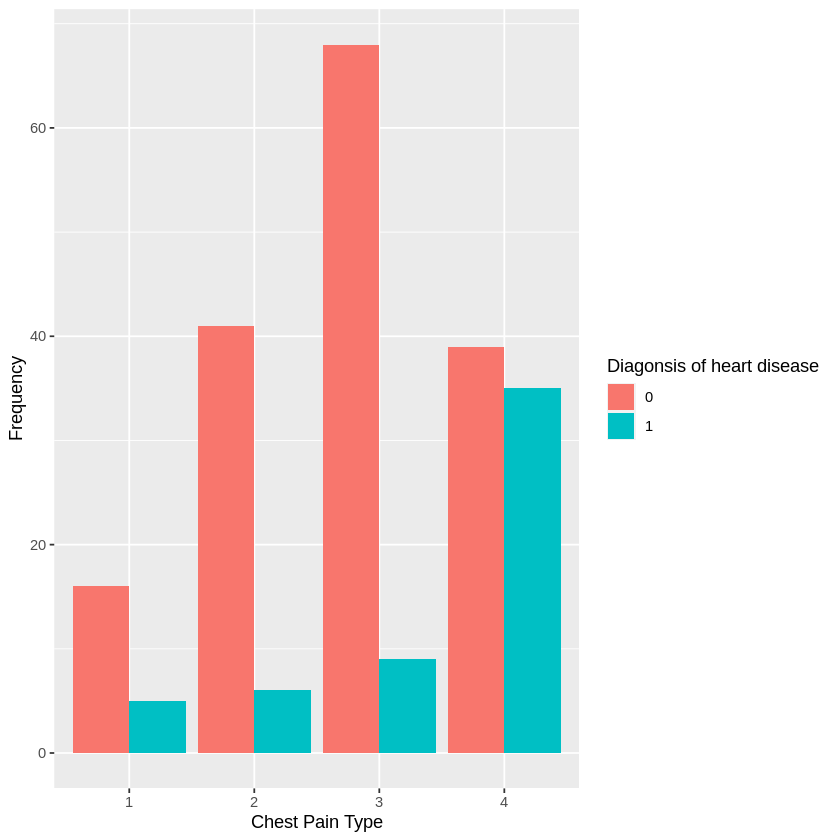

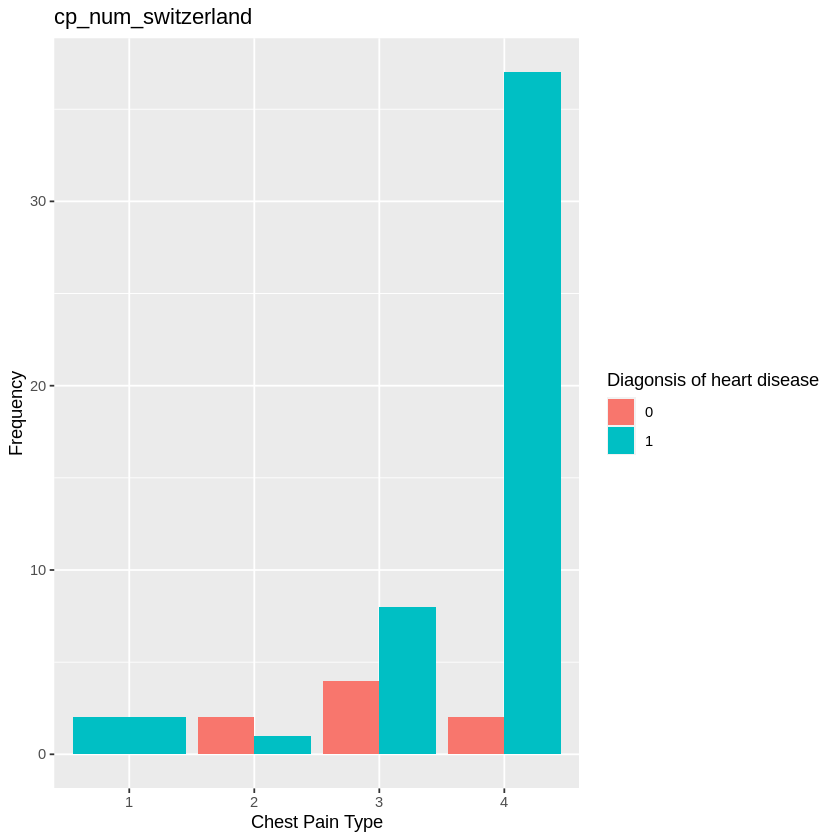

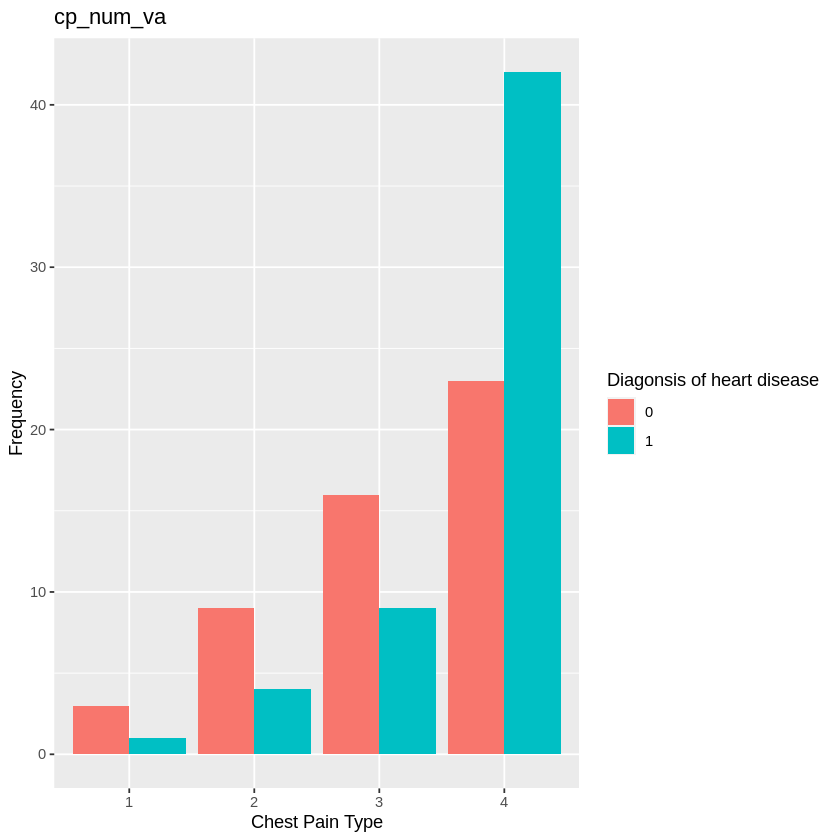

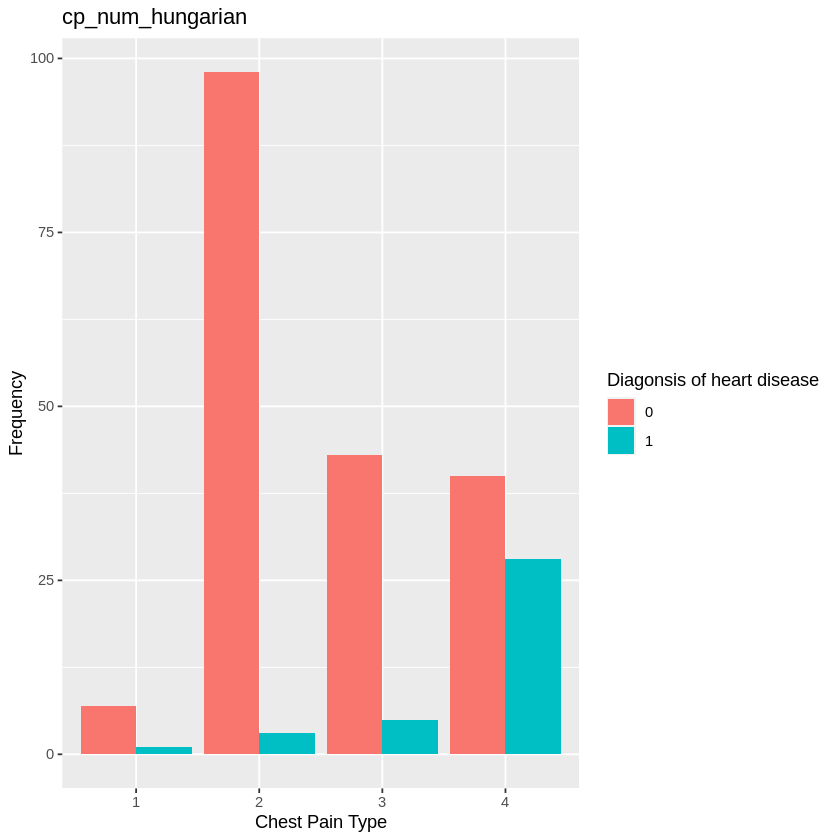

In [36]:
"Compare cp_num for 4 regions"
cp_num_cleaveland
cp_num_switzerland
cp_num_va
cp_num_hungarian


"levels(cleaveland_mutate$num) <- c("No Heart Disease", "Heart Disease")  # changes 1,2,3 to alphabets
levels(cleaveland_mutate$thal) <- c("Normal", "Fixed Defect", "Reversaable Defect")
levels(cleaveland_mutate$slope) <- c("upsloping", "flat", "downsloping")
levels(cleaveland_mutate$exang) <- c("Yes", "No")
levels(cleaveland_mutate$restecg) <- c("Normal", "ST-T wave abnormality")
levels(cleaveland_mutate$fbs) <- c("true", "false")
levels(cleaveland_mutate$cp) <- c("typical angina", "atypical angina", "non-anginal pain", "aaasymptomatic")
levels(cleaveland_mutate$sex) <- c("Female", "Male")"


heart_split <- initial_split(cleaveland_mutate, prop = 0.75, strata = num)
heart_training <- training(heart_split)
heart_testing <- testing(heart_split)

knn_recipe <- recipe(num ~ age + trestbps + chol + thalach + oldpeak, data = heart_training)|>
step_scale(all_predictors())|>
step_center(all_predictors())



knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune())|>
set_engine("kknn")|>
set_mode("classification")

heart_vfold <- vfold_cv(heart_training, v = 5, strata = num)

k_vals <- (tibble(neighbors=1:30))

knn_results <- workflow()|>
add_recipe(knn_recipe)|>
add_model(knn_spec)|>
tune_grid(resamples = heart_vfold, grid = k_vals)|>
collect_metrics()
                 
                 
accuracies <- knn_results |>
                 filter(.metric == "accuracy")
                
accuracies
         




knn_spec1 <- nearest_neighbor(weight_func = "rectangular", neighbors = 18)|>
set_engine("kknn")|>
set_mode("classification")


knn_fit1 <- workflow()|>
add_recipe(knn_recipe)|>
add_model(knn_spec1)|>
fit(data = heart_training)
                 

heart_test_predictions <- predict(knn_fit1, heart_testing)|>
bind_cols(heart_testing)

heart_test_predictions|>
metrics(truth = num, estimate = .pred_class) |>
filter(.metric =="accuracy")

